# 43개 데이터 불러오기


In [1]:
from geoband.API import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import pandas as pd
import json
from pandas import json_normalize
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geoband.API import *
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from geopandas import GeoDataFrame
# GetCompasData로 주피터 노트북 경로에 파일 저장

In [29]:
GetCompasData('SBJ_2109_001', '1', '1.수원시_112신고이력(격자_관할경계매핑).csv')
GetCompasData('SBJ_2109_001', '2', '2.수원시_112신고(격자별 신고횟수).geojson')
GetCompasData('SBJ_2109_001', '3', '3.3개시도_112신고이력(관할경계매핑).csv')
GetCompasData('SBJ_2109_001', '4', '4.수원시_시간대별_유동인구(2020).csv')
GetCompasData('SBJ_2109_001', '5', '5.수원시_성연령별_유동인구(2020).csv')
GetCompasData('SBJ_2109_001', '6', '6.수원시_요일별_유동인구(2020).csv')
GetCompasData('SBJ_2109_001', '7', '7.4개시도_주택노후도.geojson')
GetCompasData('SBJ_2109_001', '8', '8.4개시도_유흥업소현황.geojson')
GetCompasData('SBJ_2109_001', '9', '9.4개시도_용도지역도.geojson')
GetCompasData('SBJ_2109_001', '10', '10.4개시도_사업지구경계도.geojson')
GetCompasData('SBJ_2109_001', '11', '11.4개시도_경찰서_관할경계.geojson')
GetCompasData('SBJ_2109_001', '12', '12.4개시도_치안안전센터_관할경계.geojson')
GetCompasData('SBJ_2109_001', '13', '13.수원시_노숙인자활시설현황.csv')
GetCompasData('SBJ_2109_001', '14', '14.수원시_아동복지시설현황.csv')
GetCompasData('SBJ_2109_001', '15', '15.수원시_지역아동센터시설현황.csv')
GetCompasData('SBJ_2109_001', '16', '16.수원시_청소년공부방현황.csv')
GetCompasData('SBJ_2109_001', '17', '17.수원시_도서관현황.csv')
GetCompasData('SBJ_2109_001', '18', '18.수원시_무료급식소현황.csv')
GetCompasData('SBJ_2109_001', '19', '19.수원시_아동복지급식소현황.csv')
GetCompasData('SBJ_2109_001', '20', '20.수원시_여성안심택배함현황.csv')
GetCompasData('SBJ_2109_001', '21', '21.수원시_가로등현황.csv')
GetCompasData('SBJ_2109_001', '22', '22.4개시도_보안등현황.csv')
GetCompasData('SBJ_2109_001', '23', '23.4개시도_안전비상벨현황.geojson')
GetCompasData('SBJ_2109_001', '24', '24.4개시도_CCTV설치현황.csv')
GetCompasData('SBJ_2109_001', '25', '25.수원시_상권(업종)현황.xlsx')
GetCompasData('SBJ_2109_001', '26', '26.수원시_건축물대장(표제부).xlsx')
GetCompasData('SBJ_2109_001', '27', '27.4개시도_공원현황.csv')
GetCompasData('SBJ_2109_001', '28', '28.수원시_도로명주소(도로).geojson')
GetCompasData('SBJ_2109_001', '29', '29.수원시_도로명주소(건물).geojson')
GetCompasData('SBJ_2109_001', '30', '30.수원시_성연령별_거주인구격자(250M_X_250M).geojson')
GetCompasData('SBJ_2109_001', '31', '31.수원시_행정경계(읍면동).geojson')
GetCompasData('SBJ_2109_001', '32', '32.수원시_표준격자(250M_x_250M).geojson')
GetCompasData('SBJ_2109_001', '33', '33.4개시도_1인가구수.csv')
GetCompasData('SBJ_2109_001', '34', '34.4개시도_기초수급자현황.csv')
GetCompasData('SBJ_2109_001', '35', '35.4개시도_성연령별_총인구분포.csv')
GetCompasData('SBJ_2109_001', '36', '36.4개시도_인구데이터(외국인).csv')
GetCompasData('SBJ_2109_001', '37', '37.4개시도_자살율.csv')
GetCompasData('SBJ_2109_001', '38', '38.4개시도_화재발생통계.csv')
GetCompasData('SBJ_2109_001', '39', '39.4개시도_경찰관서현황.csv')
GetCompasData('SBJ_2109_001', '40', '40.4개시도_어린이놀이시설현황.csv')
GetCompasData('SBJ_2109_001', '41', '41.4개시도_토지이용계획도.geojson')
GetCompasData('SBJ_2109_001', '42', '42.4개시도_편의점현황.geojson')

In [30]:
suwon_112 = pd.read_csv('1.수원시_112신고이력(격자_관할경계매핑).csv')
suwon_112_grid = gpd.read_file('2.수원시_112신고(격자별 신고횟수).geojson')
others_112 = pd.read_csv('3.3개시도_112신고이력(관할경계매핑).csv')
suwon_time_flow_pop = pd.read_csv('4.수원시_시간대별_유동인구(2020).csv')
suwon_sex_age_flow_pop = pd.read_csv('5.수원시_성연령별_유동인구(2020).csv')
suwon_day_flow_pop = pd.read_csv('6.수원시_요일별_유동인구(2020).csv')
others_old_house = gpd.read_file('7.4개시도_주택노후도.geojson')
others_alcohol = gpd.read_file('8.4개시도_유흥업소현황.geojson')
others_use_area = gpd.read_file('9.4개시도_용도지역도.geojson')
others_business_area = gpd.read_file('10.4개시도_사업지구경계도.geojson')
others_police_area = gpd.read_file('11.4개시도_경찰서_관할경계.geojson')
others_police_box_area = gpd.read_file('12.4개시도_치안안전센터_관할경계.geojson')
suwon_homeless = pd.read_csv('13.수원시_노숙인자활시설현황.csv')
suwon_child_welfare = pd.read_csv('14.수원시_아동복지시설현황.csv')
suwon_child_center = pd.read_csv('15.수원시_지역아동센터시설현황.csv')
suwon_youth_study = pd.read_csv('16.수원시_청소년공부방현황.csv')
suwon_library = pd.read_csv('17.수원시_도서관현황.csv')
suwon_free_cafeteria =pd.read_csv('18.수원시_무료급식소현황.csv')
suwon_child_free_cafeteria = pd.read_csv('19.수원시_아동복지급식소현황.csv')
suwon_female_parcel = pd.read_csv('20.수원시_여성안심택배함현황.csv')
suwon_street_lamp = pd.read_csv('21.수원시_가로등현황.csv')
others_security_lamp = pd.read_csv('22.4개시도_보안등현황.csv')
others_security_bell = gpd.read_file('23.4개시도_안전비상벨현황.geojson')
others_cctv = pd.read_csv('24.4개시도_CCTV설치현황.csv')
suwon_commercial_area = pd.read_excel('25.수원시_상권(업종)현황.xlsx')
suwon_building = pd.read_excel('26.수원시_건축물대장(표제부).xlsx')
others_park =pd.read_csv('27.4개시도_공원현황.csv')
suwon_road_name = gpd.read_file('28.수원시_도로명주소(도로).geojson')
suwon_building_road_name = gpd.read_file('29.수원시_도로명주소(건물).geojson')
suwon_sex_age_pop = gpd.read_file('30.수원시_성연령별_거주인구격자(250M_X_250M).geojson')
suwon_admin_area = gpd.read_file('31.수원시_행정경계(읍면동).geojson')
suwon_grid = gpd.read_file('32.수원시_표준격자(250M_x_250M).geojson')
others_one_person = pd.read_csv('33.4개시도_1인가구수.csv')
others_basic_recipient = pd.read_csv('34.4개시도_기초수급자현황.csv')
others_sex_age_pop = pd.read_csv('35.4개시도_성연령별_총인구분포.csv')
others_foreigner_pop = pd.read_csv('36.4개시도_인구데이터(외국인).csv')
others_suicide = pd.read_csv('37.4개시도_자살율.csv')
others_fire = pd.read_csv('38.4개시도_화재발생통계.csv')
others_police = pd.read_csv('39.4개시도_경찰관서현황.csv')
others_playground = pd.read_csv('40.4개시도_어린이놀이시설현황.csv')
others_land_use_plan = gpd.read_file('41.4개시도_토지이용계획도.geojson')
others_convenience = gpd.read_file('42.4개시도_편의점현황.geojson')

sido    시도별
sgg_nm    시군구별
sx    성별구분
dead_num_2017    사망자수(명)_2017
dptt_2017    사망률(십만명당)_2017
age_stndrd_dptt_2017    연령표준화사망률(십만명당)_2017
dead_num_2018    사망자수(명)_2018
dptt_2018    사망률(십만명당)_2018
age_stndrd_dptt_2018    연령표준화 사망률(십만명당)_2018
dead_num_2019    사망자수(명)_2019
dptt_2019    사망률(십만명당)_2019
age_stndrd_dptt_2019    연령표준화 사망률(십만명당)_2019

In [2]:
others_suicide = pd.read_csv('37.4개시도_자살율.csv')

### 경계파일
1) SIG = gpd.read_file("TL_SCCO_SIG.json") 시군구 경계파일
- 서울 11 / 수원 41 / 창원,진주 48 

2) HJD = gpd.read_file("전국행정동_경계구역.geojson") 행정동 경계파일

In [12]:
HJD

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."
...,...,...,...,...,...,...,...,...,...
3490,817,인천광역시 연수구 송도5동,2304069,2818586000,28185,28,인천광역시,연수구,"MULTIPOLYGON (((126.63465 37.40951, 126.63401 ..."
3491,1605,경기도 광주시 쌍령동,3125056,4161054000,41610,41,경기도,광주시,"MULTIPOLYGON (((127.26237 37.40245, 127.26277 ..."
3492,1606,경기도 광주시 송정동,3125055,4161052000,41610,41,경기도,광주시,"MULTIPOLYGON (((127.25174 37.41652, 127.25302 ..."
3493,1607,경기도 광주시 광남1동,3125058,4161056000,41610,41,경기도,광주시,"MULTIPOLYGON (((127.23798 37.38151, 127.23785 ..."


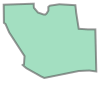

In [9]:
HJD.iloc[0,8]

In [3]:
SIG = gpd.read_file("전국시군구_경계구역.json")
HJD = gpd.read_file("전국행정동_경계구역.geojson")

SIG_4 = SIG[(SIG["SIG_CD"].str[:2] == "11") | 
            (SIG["SIG_KOR_NM"].str.split(" ").str[0] == "수원시") | 
            (SIG["SIG_KOR_NM"].str.split(" ").str[0] == "창원시") |
            (SIG["SIG_KOR_NM"].str.split(" ").str[0] == "진주시")]
# 서울 수원 창원 진주의 시군구 경계구역만 가져오기

SIG_4["sgg_nm"] =  SIG_4["SIG_KOR_NM"].apply(lambda x : x.split(" ")[-1])
# '창원시 의창구 -> 의창구'

In [4]:
from folium import Choropleth

SIG_map = folium.Map(location=[33.253949,126.559658],zoom_start=6)

Choropleth(geo_data = SIG_4["geometry"].__geo_interface__,key_on = "feature.id",
           fill_color='YlGnBu').add_to(SIG_map)

SIG_map

### Choropleth_sgg : 시군구별 수치 시각화
- 2개의 dataframe 모두 동일한 컬럼(index)을 가지고 있어야 get_Choropleth_sgg 함수 작동

In [15]:
others_suicide_m

,sido,sgg_nm,sx,dead_num_2017,dptt_2017,age_stndrd_dptt_2017,dead_num_2018,dptt_2018,age_stndrd_dptt_2018,dead_num_2019,dptt_2019,age_stndrd_dptt_2019
0,서울특별시,종로구,남자,33,45.3,37.2,22,30.3,28.7,30,41.9,32.0
2,서울특별시,중구,남자,20,33.4,26.0,17,28.4,20.0,20,33.4,28.5
4,서울특별시,용산구,남자,36,33.7,29.8,33,31.0,26.8,27,25.4,19.6
6,서울특별시,성동구,남자,50,34.1,28.4,40,27.0,22.7,41,28.0,21.6
8,서울특별시,광진구,남자,54,31.4,28.0,55,32.2,28.2,44,26.1,21.5
10,서울특별시,동대문구,남자,55,31.8,26.7,58,33.9,28.6,55,32.5,25.2
12,서울특별시,중랑구,남자,74,36.8,30.9,77,38.8,31.1,80,40.9,32.0
14,서울특별시,성북구,남자,69,32.2,27.9,72,34.2,27.2,81,38.7,30.3
16,서울특별시,강북구,남자,63,40.2,32.1,60,38.8,31.8,47,31.0,22.6
18,서울특별시,도봉구,남자,69,41.1,35.1,54,32.7,27.6,53,32.6,26.3


In [5]:
def get_Choropleth_sgg(df,col,index,geo_df):
    df = GeoDataFrame(df.set_index(index))

    # 행정동명을 index로
    
    gdf = GeoDataFrame(geo_df[index],
                   geometry = geo_df["geometry"]).set_index(index)
    
    # Create a base map
    #결과_map = folium.Map(location=[33.253949,126.559658], tiles='cartodbpositron', zoom_start=10)
    결과_map = folium.Map(location=[36.38,127.51],tiles='cartodbpositron' ,zoom_start=7)
    # Add a choropleth map to the base map
    Choropleth(geo_data= gdf["geometry"].__geo_interface__, 
               data=df[col], 
               key_on="feature.id", 
               fill_color='PuRd').add_to(결과_map)
                # PuRd / YlGnBu

    return 결과_map

### 37번 : 4개 시도 자살율
- 진주시 진주시
- 창원시 의창구', '창원시 성산구', '창원시 마산합포구', '창원시 마산회원구
- '수원시 장안구', '수원시 권선구', '수원시 팔달구', '수원시 영통구'
- 서울시
- 2017년 ~ 2018년

In [6]:
aggregation = {i:"mean" for i in others_suicide.columns[3:]}

others_suicide_m = others_suicide[others_suicide["sx"] == "남자"]
others_suicide_f = others_suicide[others_suicide["sx"] == "여자"]

others_suicide_all = others_suicide.groupby(["sido","sgg_nm"]).agg(aggregation).reset_index()

In [7]:
get_Choropleth_sgg(others_suicide_m,"age_stndrd_dptt_2017","sgg_nm",SIG_4)

In [113]:
get_Choropleth_sgg(others_suicide_m,"dptt_2017","sgg_nm",SIG_4)